# Spam Detection 

Spam Detection is basically deciding whether a sentence is spam or not a spam. We are going to do all the basic step by step process to find the sentence as spam or not

## Step1 

- Import all the libraries
- Load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk import chunk
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [2]:
data=pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


# Step 2 - Data Preprocessing

In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.drop("Unnamed: 2",axis=1,inplace=True)
data.drop("Unnamed: 3",axis=1,inplace=True)
data.drop("Unnamed: 4",axis=1,inplace=True)


In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Labeling Spams as 1 and Hams as 0

In [8]:
data["v1"] = data["v1"].replace(["spam","ham"],[1,0])

In [9]:
data.head()


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
lem=WordNetLemmatizer()
stop =stopwords.words("english")

# Step 3 - Text preprocessing 

In [14]:
new_data=[]
for i in data["v2"]:
    i=i.lower()
    i=re.sub(r"[^ a-z0-9]"," ",i)
    i=re.sub(r"\s+",' ',i)
    i= [lem.lemmatize(word) for word in i.split() if word not in stop]
    i = ' '.join(i)
    new_data.append(i)


In [15]:
word_dict={}
df=pd.DataFrame({"word":list(word_dict.keys()),"Freequency":list(word_dict.values())})
df.head()

,word,Freequency


In [16]:
word_dict={}
for sent in new_data:
    for word in sent.split():
        if word not in word_dict.keys():
            word_dict[word]=1
        else:
            word_dict[word]+=1

In [17]:
df=pd.DataFrame({"word":list(word_dict.keys()),"Freequency":list(word_dict.values())})
df.head()

,word,Freequency
0,go,307
1,jurong,1
2,point,33
3,crazy,15
4,available,18


# Step 4 - Converting data into vectors

In [20]:
tfidf = TfidfVectorizer()
cv = CountVectorizer()


In [21]:
x_tf=tfidf.fit_transform(new_data).toarray()
c_cv=cv.fit_transform(new_data).toarray()

In [23]:
x_tf.shape

(5572, 7963)

In [25]:
c_cv.shape

(5572, 7963)

In [26]:
tfidf.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [27]:
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [28]:
y = data["v1"]

In [29]:
y.shape

(5572,)

# Step 5 - Divide the data into train test split

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_tf,y,test_size=.20,random_state=101)

In [32]:
x_train.shape,x_train.shape,y_train.shape,y_test.shape

((4457, 7963), (4457, 7963), (4457,), (1115,))

# Step 6 - Building the Model

In [33]:
model_mb = MultinomialNB()

In [34]:
model_mb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
predict_mb=model_mb.predict(x_test)

# Step 7 - Metrics

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_auc_score

In [38]:
print("Accuracy:",accuracy_score(y_test,predict_mb))

Accuracy: 0.9704035874439462


In [39]:
print(classification_report(y_test,predict_mb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       977
           1       1.00      0.76      0.86       138

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



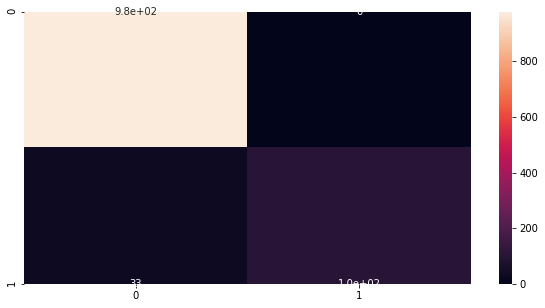

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,predict_mb),annot=True)
plt.show()

# Step 8 - Predictions with new input

In [47]:
test = input("Enter the new string =")

Enter the new string =hi how are you


In [48]:
i=test.lower()
i=re.sub(r"[^ a-z0-9]"," ",test)
i=re.sub(r"\s+",' ',test)
i= [lem.lemmatize(word) for word in i.split() if word not in stop]
i = ' '.join(i) 

### Vectorize the test input

In [49]:
test_vec=tfidf.transform([i]).toarray()

In [50]:
test_pre=model_mb.predict(test_vec)

In [51]:
test_pre

array([0], dtype=int64)

In [52]:
model_mb.predict_proba(test_vec)

array([[0.96744787, 0.03255213]])